# 1 - Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib
# import matplotlib.backends.backend_tkagg
# matplotlib.use('tkagg')
import warnings
warnings.filterwarnings('ignore') 
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
from sklearn.decomposition import PCA

# 2 - Data Loading

In [2]:
df = pd.read_csv('telco_data_clean.csv', index_col=False)
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Low Expense,1
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,One year,No,Mailed check,56.95,1889.50,No,Medium Expense,3
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Medium Expense,4
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1


# 3 - Feature Selection

In [3]:
dfnew = df.loc[(df['churn']=='Yes')]
dfnew.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn,monthly_charges_cat,tenure_year
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Medium Expense,1
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Medium High Expense,1
5,Female,No,No,No,8,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,High Expense,1
8,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,High Expense,3
13,Male,No,No,No,49,Yes,Yes,Fiber optic,No,Yes,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,High Expense,5


In [4]:
dfnew.shape

(1869, 22)

In [5]:
dfnew.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'tenure',
       'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn',
       'monthly_charges_cat', 'tenure_year'],
      dtype='object')

In [6]:
for x in df.columns:
    contingency_table4 = pd.crosstab(df[x],df['churn'])
    print(f'column {x} {stats.chi2_contingency(contingency_table4).pvalue}')

column gender 0.4904884707065509
column senior_citizen 2.4792557203954705e-36
column partner 3.97379757451591e-36
column dependents 2.0196592017051303e-42
column tenure 3.471813048469505e-176
column phone_service 0.34992398942431924
column multiple_lines 0.0035679273999811405
column internet_service 5.831198962237274e-159
column online_security 1.4006867477839222e-184
column online_backup 7.776099238804965e-131
column device_protection 1.9593887862403176e-121
column tech_support 7.407807748843711e-180
column streaming_tv 1.324641113169159e-81
column streaming_movies 5.353560421401324e-82
column contract 7.326182186265472e-257
column paperless_billing 8.236203353962564e-58
column payment_method 1.4263098511063342e-139
column monthly_charges 2.9951566174415275e-18
column total_charges 0.5858750101997261
column churn 0.0
column monthly_charges_cat 7.984983286537826e-73
column tenure_year 2.358395063933462e-188


In [7]:
columns = ['senior_citizen','partner','dependents', 'internet_service', 'tenure',
        'online_security','online_backup','device_protection','tech_support',
        'streaming_tv', 'streaming_movies', 'contract',
        'paperless_billing', 'payment_method', 'monthly_charges', 'churn']
dfnew = dfnew.drop(columns=[col for col in dfnew if col not in columns])
dfnew.columns

Index(['senior_citizen', 'partner', 'dependents', 'tenure', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'churn'],
      dtype='object')

In [8]:
new_num = ['tenure', 'monthly_charges']
new_cat = ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 
       'contract', 'paperless_billing', 'payment_method', 'churn']

# 4 - Feature Scaling

In [9]:
for x in new_num:
    print(x, 'skewness is', dfnew[x].skew())

tenure skewness is 1.1492802882380029
monthly_charges skewness is -0.7293738092658485


In [10]:
scaler = StandardScaler()
dfnew_scaled = scaler.fit_transform(dfnew[new_num])

# 5 - Merge Data

In [11]:
dfnew_final = np.concatenate([dfnew_scaled, dfnew[new_cat]], axis=1)
dfnew_final = pd.DataFrame(dfnew_final, columns=['tenure', 'monthly_charges'] + new_cat)
dfnew_final = dfnew_final.infer_objects()
dfnew_final

,tenure,monthly_charges,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,churn
0,-0.818356,-0.835028,No,No,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
1,-0.818356,-0.151720,No,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
2,-0.511072,1.022272,No,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
3,0.513209,1.231117,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
4,1.588704,1.186509,No,No,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,-0.306216,-0.593741,No,No,No,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,Yes
1865,-0.459858,-1.226359,No,No,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes
1866,-0.869570,0.053070,Yes,No,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
1867,2.510556,1.156095,No,No,No,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),Yes


# 6 - Model Definition

In [12]:
index_cat_columns = [dfnew_final.columns.get_loc(col) for col in new_cat]

print('Categorical columns        : ', new_cat)
print('Categorical columns index  : ', index_cat_columns)

Categorical columns        :  ['senior_citizen', 'partner', 'dependents', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'payment_method', 'churn']
Categorical columns index  :  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


Cluster creation :  2
Cluster creation :  3
Cluster creation :  4
Cluster creation :  5
Cluster creation :  6


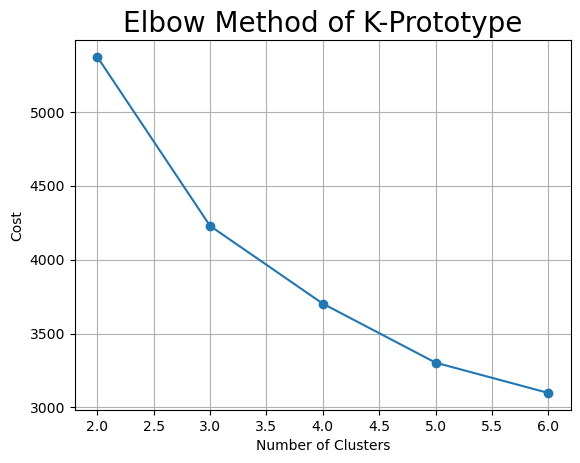

In [13]:
max_clusters = 6
cost = []
for k in range(2, max_clusters+1):
  kproto = KPrototypes(n_clusters=k, init='Huang', random_state=42, n_jobs=-1)
  kproto.fit_predict(dfnew_final, categorical=index_cat_columns)
  cost.append(kproto.cost_)
  print('Cluster creation : ', k)

plt.plot(range(2, max_clusters+1), cost, marker ="o")
plt.grid()
plt.title('Elbow Method of K-Prototype', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Cost')
plt.show()

# 7 - Model Training

In [14]:
kp = KPrototypes(n_clusters=3, random_state=42)
pred = kp.fit_predict(dfnew_final, categorical=index_cat_columns)
pred

array([1, 2, 2, ..., 2, 0, 2], dtype=uint16)

In [15]:
dfnew['cluster'] = pred
dfnew

,senior_citizen,partner,dependents,tenure,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,churn,cluster
2,No,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,1
4,No,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,2
5,No,No,No,8,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes,2
8,No,Yes,No,28,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes,0
13,No,No,No,49,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7010,No,No,No,12,DSL,No,No,No,Yes,Yes,No,One year,Yes,Electronic check,59.80,Yes,1
7015,No,No,No,9,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),44.20,Yes,1
7021,Yes,No,No,1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,Yes,2
7023,No,No,No,67,Fiber optic,Yes,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,Yes,0


# 8 - Model Analysis

<Axes: >

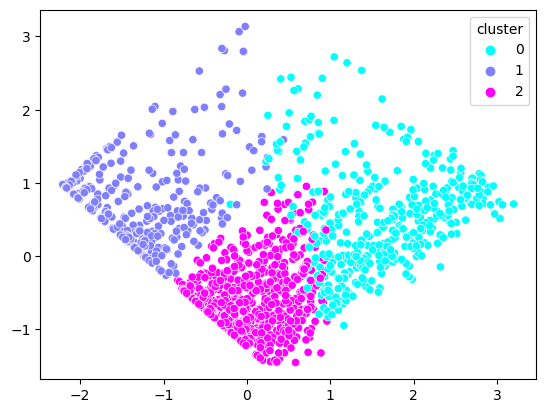

In [16]:
pca_2d = PCA(n_components=2)
pca_2d.fit(dfnew_scaled)

dfnew_scaled_pca_2d = pca_2d.fit_transform(dfnew_scaled)

sns.scatterplot(x=dfnew_scaled_pca_2d[:,0], y=dfnew_scaled_pca_2d[:,1], hue=dfnew['cluster'], palette='cool')

## 8.1 - 1st Cluster

In [17]:
dfnew[dfnew['cluster']==0].describe()

,tenure,monthly_charges,cluster
count,446.000000,446.000000,446.0
mean,46.964126,94.004596,0.0
std,13.997225,15.253933,0.0
min,19.000000,39.300000,0.0
25%,36.000000,86.000000,0.0
50%,47.000000,99.050000,0.0
75%,58.000000,104.500000,0.0
max,72.000000,118.350000,0.0


In [18]:
df_c0 = dfnew[dfnew['cluster']==0]

In [19]:
df_c1 = dfnew[dfnew['cluster']==1]

In [20]:
df_c2 = dfnew[dfnew['cluster']==2]

In [21]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==0][x].value_counts())

senior_citizen
No     294
Yes    152
Name: count, dtype: int64
partner
Yes    281
No     165
Name: count, dtype: int64
dependents
No     339
Yes    107
Name: count, dtype: int64
internet_service
Fiber optic    386
DSL             60
Name: count, dtype: int64
online_security
No     319
Yes    127
Name: count, dtype: int64
online_backup
Yes    255
No     191
Name: count, dtype: int64
device_protection
Yes    269
No     177
Name: count, dtype: int64
tech_support
No     306
Yes    140
Name: count, dtype: int64
streaming_tv
Yes    352
No      94
Name: count, dtype: int64
streaming_movies
Yes    354
No      92
Name: count, dtype: int64
contract
Month-to-month    279
One year          125
Two year           42
Name: count, dtype: int64
paperless_billing
Yes    362
No      84
Name: count, dtype: int64
payment_method
Electronic check             239
Bank transfer (automatic)     95
Credit card (automatic)       91
Mailed check                  21
Name: count, dtype: int64
churn
Yes    446
Name:

## 8.2 - 2nd Cluster

In [22]:
dfnew[dfnew['cluster']==1].describe()

,tenure,monthly_charges,cluster
count,477.000000,477.000000,477.0
mean,8.203354,38.840042,1.0
std,11.315498,13.626142,0.0
min,1.000000,18.850000,1.0
25%,1.000000,24.750000,1.0
50%,3.000000,44.150000,1.0
75%,11.000000,50.150000,1.0
max,61.000000,63.600000,1.0


In [23]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==1][x].value_counts())

senior_citizen
No     411
Yes     66
Name: count, dtype: int64
partner
No     359
Yes    118
Name: count, dtype: int64
dependents
No     383
Yes     94
Name: count, dtype: int64
internet_service
DSL    364
No     113
Name: count, dtype: int64
online_security
No                     297
No internet service    113
Yes                     67
Name: count, dtype: int64
online_backup
No                     295
No internet service    113
Yes                     69
Name: count, dtype: int64
device_protection
No                     297
No internet service    113
Yes                     67
Name: count, dtype: int64
tech_support
No                     299
No internet service    113
Yes                     65
Name: count, dtype: int64
streaming_tv
No                     303
No internet service    113
Yes                     61
Name: count, dtype: int64
streaming_movies
No                     297
No internet service    113
Yes                     67
Name: count, dtype: int64
contract
Month-to-month 

## 8.3 - 3rd Cluster

In [24]:
dfnew[dfnew['cluster']==2].describe()

,tenure,monthly_charges,cluster
count,946.000000,946.000000,946.0
mean,9.243129,83.169239,2.0
std,8.726538,10.145146,0.0
min,1.000000,64.400000,2.0
25%,2.000000,74.750000,2.0
50%,7.000000,81.075000,2.0
75%,14.000000,90.550000,2.0
max,43.000000,112.950000,2.0


In [25]:
for x in new_cat:
    print(dfnew[dfnew['cluster']==2][x].value_counts())

senior_citizen
No     688
Yes    258
Name: count, dtype: int64
partner
No     676
Yes    270
Name: count, dtype: int64
dependents
No     821
Yes    125
Name: count, dtype: int64
internet_service
Fiber optic    911
DSL             35
Name: count, dtype: int64
online_security
No     845
Yes    101
Name: count, dtype: int64
online_backup
No     747
Yes    199
Name: count, dtype: int64
device_protection
No     737
Yes    209
Name: count, dtype: int64
tech_support
No     841
Yes    105
Name: count, dtype: int64
streaming_tv
No     545
Yes    401
Name: count, dtype: int64
streaming_movies
No     549
Yes    397
Name: count, dtype: int64
contract
Month-to-month    928
One year           18
Name: count, dtype: int64
paperless_billing
Yes    769
No     177
Name: count, dtype: int64
payment_method
Electronic check             642
Bank transfer (automatic)    113
Mailed check                 105
Credit card (automatic)       86
Name: count, dtype: int64
churn
Yes    946
Name: count, dtype: int64


Cluster 1:

Karakteristik:
Sebagian besar adalah warga senior.
Ada pasangan dan tanggungan.
Layanan internet berupa serat optik.
Tinggi berpartisipasi dalam layanan online seperti streaming TV dan film.
Kontrak bulanan dengan penagihan tanpa kertas dan pembayaran dengan cek elektronik.
Biaya bulanan tinggi.

Insight:
Cluster ini mewakili warga senior dengan preferensi layanan internet fiber optik berkecepatan tinggi dan kecenderungan untuk menggunakan layanan streaming online. rata-rata tenur pendek (34 bulan)
Tingkat pemutusan langganan yang tinggi dalam cluster ini bisa disebabkan oleh ketidakpuasan terhadap kualitas layanan, biaya tinggi, atau faktor lain yang menyebabkan pembatalan langganan.

Saran:
Lakukan survei kepuasan pelanggan untuk mengidentifikasi penyebab ketidakpuasan mereka sperti kecepatan internet yang turun secara tiba-tiba / tidak stabil, sering ada ganngguan signal. dengan mengetahui penyebab pasti dari ketidak puasan customer, perusahaan dapat melakukan perbaikan dan pengembangan terkait produk yang diberikan. selain itu untuk cluster ini dapat ditawarkan paket-paket dengan kontrak jangka panjang yang mungkin menarik bagi pelanggan senior. seperti paket loyalitas untuk kontrak jangka panjang seperti mendapatkan tambahan kecepatan up to sekian selama 3 bulan bagi yang telah berlangganan di atas 3 tahun, memberlakukan open all channel selama kurun waktu tertentu untuk event lebaran, natal, dan lain-lain
Berikan penawaran khusus atau diskon kepada pelanggan dalam cluster ini untuk meningkatkan nilai keseluruhan layanan seperti menambah kecepatan up to xxx dengan harga yang sama selama 6 bulan pertama.
Meningkatkan komunikasi dengan pelanggan mengenai fitur-fitur tambahan yang dapat meningkatkan pengalaman mereka.

Cluster 2:

Karakteristik:
Campuran pelanggan senior dan non-senior.
Ada pasangan dan tanggungan.
Layanan internet DSL.
Partisipasi yang bervariasi dalam fitur keamanan dan cadangan online.
Kontrak bulanan dengan beragam metode pembayaran.
Biaya bulanan rendah hingga sedang.

Insight:
Cluster ini mencakup campuran pelanggan, baik senior maupun non-senior, dengan layanan internet DSL, menunjukkan preferensi terhadap opsi internet yang lebih tradisional dan mungkin lebih terjangkau.
Tenur pendek (rata-rata 3 bulan) menunjukkan tren pelanggan baru, dan tingkat pemutusan langganan yang tinggi bisa disebabkan oleh ketidakpuasan awal terhadap layanan atau syarat kontrak.
Diversifikasi metode pembayaran mungkin menunjukkan bahwa pelanggan dalam cluster ini memiliki preferensi yang berbeda dalam penanganan penagihan.

Saran:
meningkatkan komunikasi di awal dengan customer mengenai syarat dan ketentuan dari kontrak yang berlaku untuk meminimalisir ketidak puasan di awal dan juga mengkomunikasikan keuntungan kontrak jangka panjang.
Tingkatkan onboarding dan orientasi untuk pelanggan baru agar mereka memahami layanan dengan baik. Pada cluster ini rata-rata tenur pendek (3 bulan) dan biaya bulan yang rendah hingga sedang sehingga  untuk meminilisir churn dapat ditawarkan paket internet DSL untuk 1 tahun dengan harga yang terjangkau yang dapat menarik pelanggan untuk tetap berlangganan.

Cluster 3:

Karakteristik:
Sebagian besar pelanggan non-senior. Sedikit atau tidak ada pasangan dan tanggungan. Layanan internet serat optik dan DSL. Partisipasi yang bervariasi dalam fitur keamanan dan cadangan online. Kontrak bulanan dengan penagihan tanpa kertas dan pembayaran dengan cek elektronik. Biaya bulanan sedang hingga tinggi.

Insight:
Cluster ini terdiri dari campuran pelanggan dengan preferensi layanan internet dan pola penggunaan yang berbeda.Tenur pendek (rata-rata 9 bulan) menunjukkan bahwa pelanggan ini mungkin tidak bertahan lama dengan layanan tersebut. Keberadaan pelanggan serat optik dan DSL dapat menunjukkan keberagaman dalam kelompok pelanggan ini, masing-masing dengan kebutuhan dan harapan yang berbeda. Tingkat pemutusan langganan yang tinggi bisa disebabkan oleh ketidakpuasan terhadap kualitas layanan, praktik penagihan, atau faktor lain.

Analisis Keseluruhan:
Saran:
untuk meminimalisir churn pada cluster golongan muda ini bisa ditawarkan produk yang sesuai dengan kebutuhan dengan harga yang terjangkau seperti kecepatan download yang tinggi, atau paket internet dengan kecepatan yang standar tetapi koneksi jauh lebih stabil yang biasanya digunakan untuk bermain game 

sesuai dengan 
melakukan analisis ketidak puasan pelanggan agar mengetahui dengan pasti apa yang menjadi ketidak puasan golongan muda ini apakah kualitas dari layanan internet atau layanan lainnya, meningkatkan komunikasi mengenai berbagai pilihan layanan internet yang sesuai dan dapat memenuhi kebutuhan customer, apakah membutuhkan kecepatan download yang tinggi, atau paket internet dengan kecepatan yang standar tetapi koneksi jauh lebih stabil yang biasanya digunakan untuk bermain game. selain itu bisa juga  dengan memperbaiki proses penagihan dan pertimbangkan variasi dalam opsi pembayaran untuk memudahkan dalam melakukan proses pembayaran

Kesimpulan:

Ketiga cluster menunjukkan kesamaan dengan memiliki tenur rata-rata yang pendek, menunjukkan tren pelanggan untuk mengakhiri layanan dengan relatif cepat. Layanan internet fiber optik menjadi faktor umum di antara cluster, menunjukkan bahwa layanan ini mungkin memiliki masalah yang menyebabkan ketidakpuasan pelanggan.

Cluster menunjukkan keberagaman dalam hal usia, jenis layanan internet, dan partisipasi dalam fitur tambahan, menunjukkan bahwa pemutusan langganan pelanggan dipengaruhi oleh berbagai faktor di luar demografi atau jenis layanan tertentu.Investigasi lebih lanjut terhadap umpan balik pelanggan, kualitas layanan, dan analisis kompetitif mungkin memberikan wawasan tambahan mengenai alasan di balik tingginya tingkat pemutusan langganan dalam cluster ini.

Selalu tingkatkan kualitas layanan dan jaga komunikasi terbuka dengan pelanggan.
Pertimbangkan program loyalitas atau insentif untuk pelanggan setia.
Monitor dan tanggapi umpan balik pelanggan secara teratur.
Sesuaikan strategi pemasaran dan penawaran berdasarkan karakteristik masing-masing cluster.
Perkuat layanan pelanggan untuk memberikan dukungan yang efektif dan responsif.

In [43]:
num_agg_df = dfnew.groupby(['cluster']).agg({'tenure': 'mean', 'monthly_charges': 'mean'})
num_agg_df = np.round(num_agg_df, decimals=2)
num_agg_df

,tenure,monthly_charges
cluster,,
0,46.96,94.00
1,8.20,38.84
2,9.24,83.17


In [45]:
#cat_agg_df = 
dfnew.groupby(['cluster', 'senior_citizen']).agg(total=('senior_citizen', 'count'))

total
cluster senior_citizen       
0       No                294
        Yes               152
1       No                411
        Yes                66
2       No                688
        Yes               258

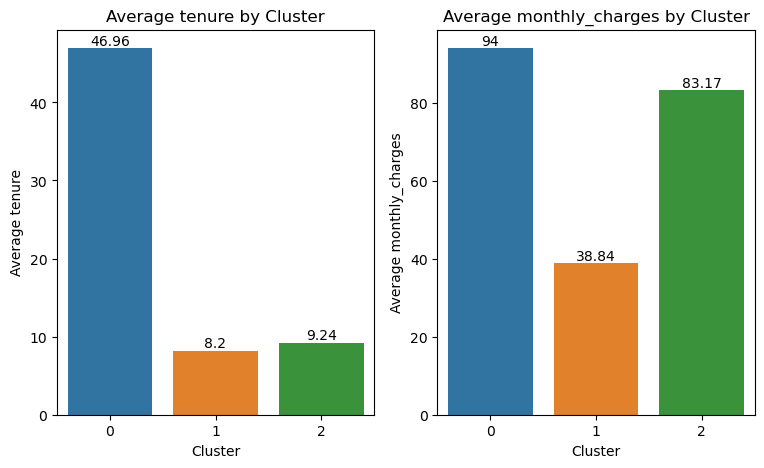

In [44]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 5))

# Loop through each subplot to populate it
for ax, column in zip(axes, num_agg_df.columns):
    # agg_data[column].plot(kind='bar', color=['blue', 'orange', 'green'], ax=ax)
    sns.barplot(ax=ax, data=num_agg_df, x=num_agg_df.index, y=column, orient='v')
    ax.set_title(f'Average {column} by Cluster')
    ax.set_xlabel('Cluster')
    ax.set_ylabel(f'Average {column}')
    ax.bar_label(ax.containers[0])
    # ax.set_xticks(range(len(agg_data[column])))
    # ax.set_xticklabels(agg_data.index, rotation=0)